In [1]:
pip install pandas numpy matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [3]:
sentiment = pd.read_csv("sentiment.csv")
trader = pd.read_csv("trader.csv")

print("Sentiment shape:", sentiment.shape)
print("Trader shape:", trader.shape)

sentiment.head()

Sentiment shape: (2644, 4)
Trader shape: (211224, 16)


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [6]:
trader.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [8]:
trader.columns = trader.columns.str.strip()
sentiment.columns = sentiment.columns.str.strip()
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')
sentiment['Date'] = sentiment['date'].dt.date
trader['Timestamp IST'] = pd.to_datetime(trader['Timestamp IST'], errors='coerce')
trader = trader.dropna(subset=['Timestamp IST'])
trader['Date'] = trader['Timestamp IST'].dt.date

In [9]:
trader.head()
sentiment.head()

,timestamp,value,classification,date,Date
0,1517463000,30,Fear,2018-02-01,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02,2018-02-02
2,1517635800,40,Fear,2018-02-03,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05,2018-02-05


In [10]:
merged = pd.merge(trader, 
                  sentiment[['Date','classification']], 
                  on='Date', 
                  how='inner')

merged.shape

(35864, 18)

In [11]:
print(merged.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'Date', 'classification'],
      dtype='object')


In [12]:
merged['win'] = np.where(merged['Closed PnL'] > 0, 1, 0)

In [13]:
merged.groupby('classification')['Closed PnL'].mean()

classification
Extreme Fear       1.891632
Extreme Greed    205.816345
Fear             128.287950
Greed             53.988003
Neutral           27.088803
Name: Closed PnL, dtype: float64

In [14]:
merged.groupby('classification')['win'].mean()

classification
Extreme Fear     0.292777
Extreme Greed    0.553282
Fear             0.381787
Greed            0.435707
Neutral          0.494920
Name: win, dtype: float64

In [15]:
merged.groupby('classification')['Size USD'].mean()

classification
Extreme Fear     4118.761840
Extreme Greed    3242.085086
Fear             5744.782685
Greed            5051.878829
Neutral          4332.202906
Name: Size USD, dtype: float64

In [16]:
merged.groupby('classification')['Size Tokens'].mean()

classification
Extreme Fear      2460.043834
Extreme Greed    16407.310318
Fear              3219.865206
Greed            14956.263148
Neutral          17720.854908
Name: Size Tokens, dtype: float64

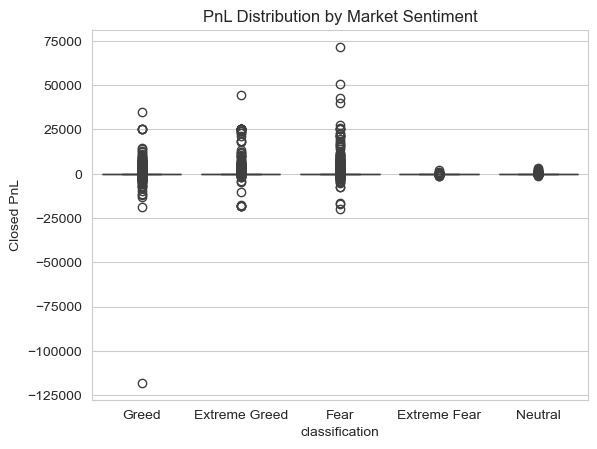

In [17]:
sns.boxplot(x='classification', y='Closed PnL', data=merged)
plt.title("PnL Distribution by Market Sentiment")
plt.show()

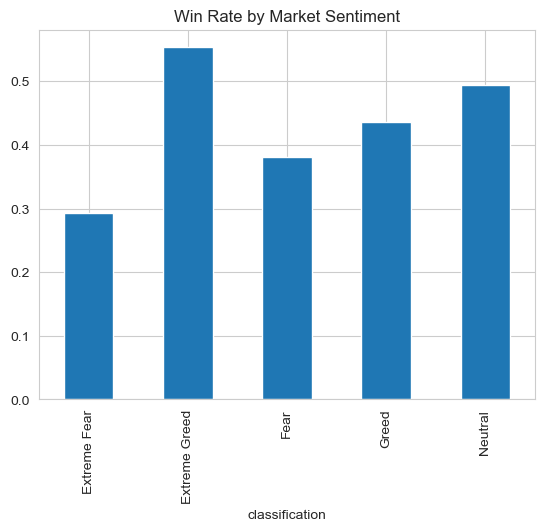

In [18]:
merged.groupby('classification')['win'].mean().plot(kind='bar')
plt.title("Win Rate by Market Sentiment")
plt.show()